# 24.10.21

## 효율적인 투자선
손해는 최소화하면서 이익은 최대화하는 법

In [5]:
# 3개의 종목을 몇대 몇대 몇 비율로 사야 위험은 최소화하면서 이익은 최대화할 수 있을까?
# 포트폴리오 설계
import FinanceDataReader as fdr

stocks = ['TSLA', 'AAPL', 'NVDA']
df = fdr.DataReader(stocks, data_source='yahoo')
df = df.dropna()
df

'data_source' and 'exchange' argument deprecated, use in symbol like these:
  fdr.DataReader('FRED:DEXKOUS', '1990-01-01')
  fdr.DataReader('FRED:DEXKOUS')
  fdr.DataReader('FRED:NASDAQCOM,M2,HSN1F')
  
  fdr.DataReader('TSE:9984', '2020-01-01')
  fdr.DataReader('NYSE:CBOE', '1990-01-01')
  fdr.DataReader('SSE:000150', '1990-01-01')

HTTP Error 401: Unauthorized  - symbol "TSLA" not found or invalid periods


KeyError: "None of [Index(['Adj Close'], dtype='object')] are in the [columns]"

In [12]:
import pandas as pd
df = pd.read_csv('stocks.csv')
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Unnamed: 0')

In [14]:
# 일간 수익률
annual_ret = daily_ret.mean() * 252
annual_ret

TSLA    0.506481
AAPL    0.277895
NVDA    0.547555
dtype: float64

In [16]:
# 분산(위험도) : 데이터 퍼짐 // 일간 변동성
daily_cov = daily_ret.cov()
daily_cov

,TSLA,AAPL,NVDA
TSLA,0.001285,0.000226,0.000374
AAPL,0.000226,0.000308,0.000244
NVDA,0.000374,0.000244,0.000823


In [17]:
annual_cov = daily_cov * 252
annual_cov

,TSLA,AAPL,NVDA
TSLA,0.323941,0.057029,0.094129
AAPL,0.057029,0.077564,0.061451
NVDA,0.094129,0.061451,0.207372


In [25]:
import numpy as np

# 몬데카를로 시뮬레이션
# 샤프지수 : (수익률 - 무위험 수익률) / 위험도
box = []
for i in range(10000):
    weights = np.random.random(len(stocks))
    weights /= sum(weights)

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    sharpe = (returns / risk)
    
    box.append([returns, risk, sharpe] + list(weights))

In [26]:
df = pd.DataFrame(box, columns = ['Returns', 'Risk', 'sharpe'] + stocks)
df

,Returns,Risk,sharpe,TSLA,AAPL,NVDA
0,0.474808,0.388278,1.222857,0.501286,0.193418,0.305296
1,0.370833,0.319586,1.160354,0.370236,0.598959,0.030805
2,0.326470,0.274775,1.188137,0.060075,0.810715,0.129210
3,0.396654,0.349358,1.135379,0.466404,0.488557,0.045038
4,0.512083,0.392152,1.305826,0.341915,0.079465,0.578620
...,...,...,...,...,...,...
9995,0.435467,0.327968,1.327772,0.284560,0.372321,0.343119
9996,0.432194,0.351758,1.228669,0.435448,0.361477,0.203076
9997,0.454072,0.340141,1.334951,0.281286,0.303825,0.414889
9998,0.409883,0.305729,1.340675,0.126461,0.491278,0.382261


In [27]:
max_sharpe = df[df['sharpe'] == df['sharpe'].max()]
max_sharpe

,Returns,Risk,sharpe,TSLA,AAPL,NVDA
7786,0.438177,0.324557,1.350077,0.180853,0.378065,0.441082


In [28]:
min_risk = df[df['Risk'] == df['Risk'].min()]
min_risk

,Returns,Risk,sharpe,TSLA,AAPL,NVDA
4749,0.309623,0.274085,1.129659,0.057454,0.873589,0.068957


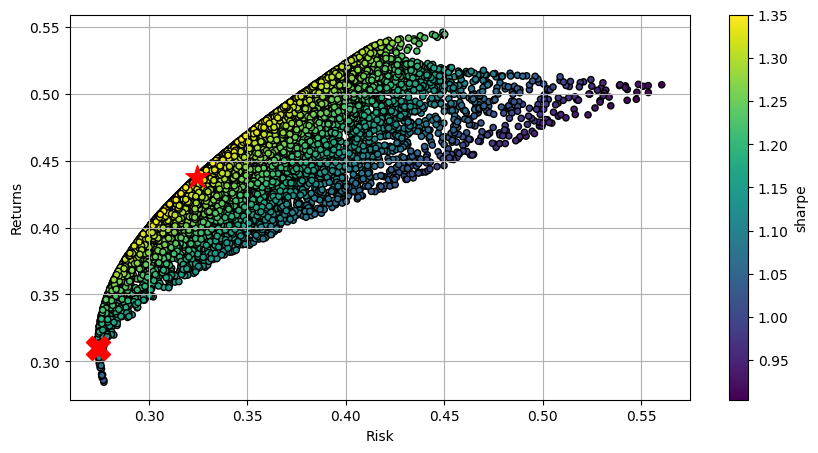

In [31]:
import matplotlib.pyplot as plt

df.plot.scatter(x = 'Risk', y = 'Returns', c = 'sharpe', cmap = 'viridis',
                edgecolor = 'k', figsize = (10, 5), grid = True)

plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'],
           c = 'r', marker = '*', s = 300)

plt.scatter(x = min_risk['Risk'], y = min_risk['Returns'],
           c = 'r', marker = 'X', s = 300)

plt.xlabel('Risk')
plt.ylabel('Returns')
plt.show()

In [34]:
# 종목간 상관관계
df = pd.read_excel('20210914.xlsx', index_col = 0)[['종목명', '종가', '시가총액']]
df['비중'] = df['시가총액'] / df['시가총액'].sum() * 100
df.sort_values('비중', ascending = False)

,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.054103
000660,SK하이닉스,107500,78260254237500,3.432078
035420,NAVER,402500,66116016487500,2.899497
207940,삼성바이오로직스,913000,60408645000000,2.649202
005935,삼성전자우,71400,58754110380000,2.576643
...,...,...,...,...
001527,동양2우B,16550,5106816950,0.000224
002787,진흥기업2우B,16050,4731668400,0.000208
000547,흥국화재2우B,29500,4531200000,0.000199


In [35]:
kospi = fdr.DataReader('KOSPI')
samsung = fdr.DataReader('005930')

1 001 2001-06-11 00:00:00 2003-06-10 00:00:00
1 001 2003-06-11 00:00:00 2005-06-10 00:00:00
1 001 2005-06-11 00:00:00 2007-06-10 00:00:00
1 001 2007-06-11 00:00:00 2009-06-10 00:00:00
1 001 2009-06-11 00:00:00 2011-06-10 00:00:00
1 001 2011-06-11 00:00:00 2013-06-10 00:00:00
1 001 2013-06-11 00:00:00 2015-06-10 00:00:00
1 001 2015-06-11 00:00:00 2017-06-10 00:00:00
1 001 2017-06-11 00:00:00 2019-06-10 00:00:00
1 001 2019-06-11 00:00:00 2021-06-10 00:00:00
1 001 2021-06-11 00:00:00 2023-06-10 00:00:00
1 001 2023-06-11 00:00:00 2025-06-10 00:00:00


<Axes: xlabel='samsung', ylabel='kospi'>

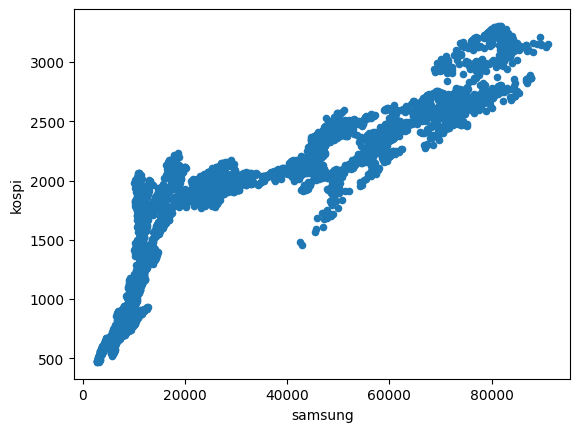

In [38]:
data = [kospi['Close'], samsung['Close']]

df = pd.concat(data, axis = 1, keys = ['kospi', 'samsung']).dropna()
df.plot.scatter(x = 'samsung', y = 'kospi')

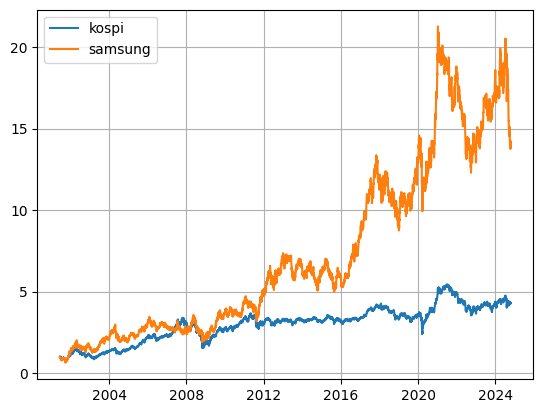

In [40]:
# df.corr()

A = df['kospi'] / df['kospi'].iloc[0]
B = df['samsung'] / df['samsung'].iloc[0]

plt.plot(A)
plt.plot(B)
plt.legend(['kospi', 'samsung'])
plt.grid()
plt.show()

## KOSPI 종목 중 SK하이닉스와 가장 상관관계가 높은 종목과 낮은 종목을 찾아보세요.

In [58]:
import os

sk = pd.read_csv("C:/Users/campus4D045/Downloads/KOSPI/SK하이닉스.csv")
sk['Date'] = pd.to_datetime(sk['Date'])
sk = sk.set_index("Date")
sk = sk['Close']

box = []
for i in os.listdir("C:/Users/campus4D045/Downloads/KOSPI"):
    name = i.split('.')[0]   
    df = pd.read_csv('C:/Users/campus4D045/Downloads/KOSPI/' + i)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index("Date")
    df = df['Close']
    
    a = pd.concat([sk, df], axis = 1, keys = ['A', 'B'])
    corr = abs(a.corr().iloc[0, 1])
    box.append([name, corr])

In [59]:
result = pd.DataFrame(box, columns = ['Name', 'Corr']).sort_values("Corr")

print(result.iloc[0])
print(result.iloc[-2])

Name          국동
Corr    0.000098
Name: 214, dtype: object
Name       SK스퀘어
Corr    0.953233
Name: 160, dtype: object


In [54]:
# 코스피 지수 통계
kospi = fdr.DataReader('KOSPI')

1 001 2001-06-11 00:00:00 2003-06-10 00:00:00
1 001 2003-06-11 00:00:00 2005-06-10 00:00:00
1 001 2005-06-11 00:00:00 2007-06-10 00:00:00
1 001 2007-06-11 00:00:00 2009-06-10 00:00:00
1 001 2009-06-11 00:00:00 2011-06-10 00:00:00
1 001 2011-06-11 00:00:00 2013-06-10 00:00:00
1 001 2013-06-11 00:00:00 2015-06-10 00:00:00
1 001 2015-06-11 00:00:00 2017-06-10 00:00:00
1 001 2017-06-11 00:00:00 2019-06-10 00:00:00
1 001 2019-06-11 00:00:00 2021-06-10 00:00:00
1 001 2021-06-11 00:00:00 2023-06-10 00:00:00
1 001 2023-06-11 00:00:00 2025-06-10 00:00:00


In [60]:
kospi['Close'].max(), kospi['Close'].min()  # 최대값, 최소값

(3305.21, 468.76)

In [56]:
kospi['Close'].idxmax()

Timestamp('2021-07-06 00:00:00')

In [57]:
kospi['Close'].idxmin()

Timestamp('2001-09-17 00:00:00')

In [62]:
kospi['변동폭'] = kospi['Close'] - kospi['Close'].shift(1)

kospi.sort_values('변동폭', ascending = False).head(5)

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,변동폭
Date,,,,,,,,,,,
2023-11-06,2399.80,2502.37,2395.03,2502.37,528584832,0.0566,1,134.03,15225479879466,1991919718242366,134.03
2020-03-24,1523.69,1609.97,1508.68,1609.97,679288486,0.0860,1,127.51,10481447737237,1083695461251076,127.51
2021-01-08,3040.11,3161.11,3040.11,3152.18,1297903388,0.0397,1,120.50,40909490005818,2170537648432200,120.50
2008-10-30,1036.83,1094.89,992.89,1084.72,621627912,0.1195,1,115.75,7404484242302,551937615919930,115.75
2020-03-20,1498.49,1566.82,1466.48,1566.15,817021497,0.0744,1,108.51,10632970114698,1054892888467243,108.51


In [65]:
# kospi['변동폭'].nlargest(5)
kospi['변동폭'].nsmallest(5)

Date
2024-08-05   -234.64
2020-03-19   -133.56
2008-10-16   -126.50
2007-08-16   -125.91
2011-08-19   -115.70
Name: 변동폭, dtype: float64

In [66]:
kospi2 = kospi.reset_index()
kospi2.head()

,Date,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,변동폭
0,2001-06-11,612.46,615.41,607.20,608.23,340123834,-0.0218,2,-13.55,1711354887650,213769808029580,NaN
1,2001-06-12,605.36,611.88,603.91,607.15,319877548,-0.0018,2,-1.08,1579309434050,213407866089170,-1.08
2,2001-06-13,611.79,614.05,607.48,614.05,392415108,0.0114,1,6.90,1882785913600,215722300556140,6.90
3,2001-06-14,612.96,623.37,610.36,613.75,420520519,-0.0005,2,-0.30,2138122210150,215864633350565,-0.30
4,2001-06-15,609.54,618.96,604.37,618.96,375830101,0.0085,1,5.21,1984248114150,217830955673590,5.21


In [68]:
# 코스피 월별 정리
how = {'Open' : 'first', 'Close' : 'last',
      'High' : 'max', 'Low' : 'min',
      'Volume' : 'sum'}

kospi2.groupby(pd.Grouper(key = 'Date', freq = 'MS')).agg(how)

,Open,Close,High,Low,Volume
Date,,,,,
2001-06-01,612.46,595.13,623.37,580.75,5446455108
2001-07-01,593.03,541.55,600.51,512.78,5648159306
2001-08-01,546.30,545.11,585.36,542.00,9651657964
2001-09-01,545.02,479.68,559.17,463.54,12162080702
2001-10-01,498.87,537.81,550.93,493.12,10307000081
...,...,...,...,...,...
2024-06-01,2657.81,2797.82,2812.62,2657.81,12186078882
2024-07-01,2792.96,2770.69,2896.43,2703.86,10790451115
2024-08-01,2787.27,2674.31,2794.11,2386.96,8692883404


In [70]:
# 언제 첫 포인트를 달성했는지
box = []
for i in range(400, 3300, 100):
    cond = kospi['Close'] >= i
    box.append([f'{i} 포인트 돌파!',
              kospi.index[cond][0], kospi.loc[cond, 'Close'].iloc[0]])

pd.DataFrame(box, columns = ['이벤트', '일자', '지수'])

,이벤트,일자,지수
0,400 포인트 돌파!,2001-06-11,608.23
1,500 포인트 돌파!,2001-06-11,608.23
2,600 포인트 돌파!,2001-06-11,608.23
3,700 포인트 돌파!,2001-12-07,704.50
4,800 포인트 돌파!,2002-02-26,801.14
5,900 포인트 돌파!,2002-03-27,902.46
6,1000 포인트 돌파!,2005-02-28,1011.36
7,1100 포인트 돌파!,2005-07-28,1104.72
8,1200 포인트 돌파!,2005-09-26,1206.41
9,1300 포인트 돌파!,2005-12-01,1305.98


In [73]:
# 코스피 기간수익률
rate = kospi.iloc[-1, 3] / kospi.iloc[0, 3]
rate = (rate - 1) * 100
rate

329.77820890123803

In [74]:
# 연 복리 수익률
diff = kospi.index[-1] - kospi.index[0]
year = diff.days / 365

cagr = rate ** (1 / year) - 1
cagr

0.28149588836570283

In [106]:
# 최대 낙폭 계산하기
kospi = fdr.DataReader('005930')
kospi['전고점'] = kospi['Close'].cummax()

# 낙폭 : Drawdown
kospi['DD'] = (1 - kospi['Close'] / kospi['전고점']) * 100
kospi

,Open,High,Low,Close,Volume,Change,전고점,DD
Date,,,,,,,,
2000-06-28,7220,7540,7220,7520,945903,NaN,7520,0.000000
2000-06-29,7600,7739,7380,7490,1222497,-0.003989,7520,0.398936
2000-06-30,7439,7540,7290,7380,705080,-0.014686,7520,1.861702
2000-07-03,7440,7550,7420,7500,519515,0.016260,7520,0.265957
2000-07-04,7600,7620,7350,7350,656229,-0.020000,7520,2.260638
...,...,...,...,...,...,...,...,...
2024-10-15,61100,61400,60100,61000,22715239,0.003289,91000,32.967033
2024-10-16,59400,60000,59200,59500,23303268,-0.024590,91000,34.615385
2024-10-17,59400,60100,59100,59700,23372873,0.003361,91000,34.395604


In [107]:
MDD = kospi['DD'].max() # 낙폭 중 가장 큰 낙폭
MDD

64.81958762886597

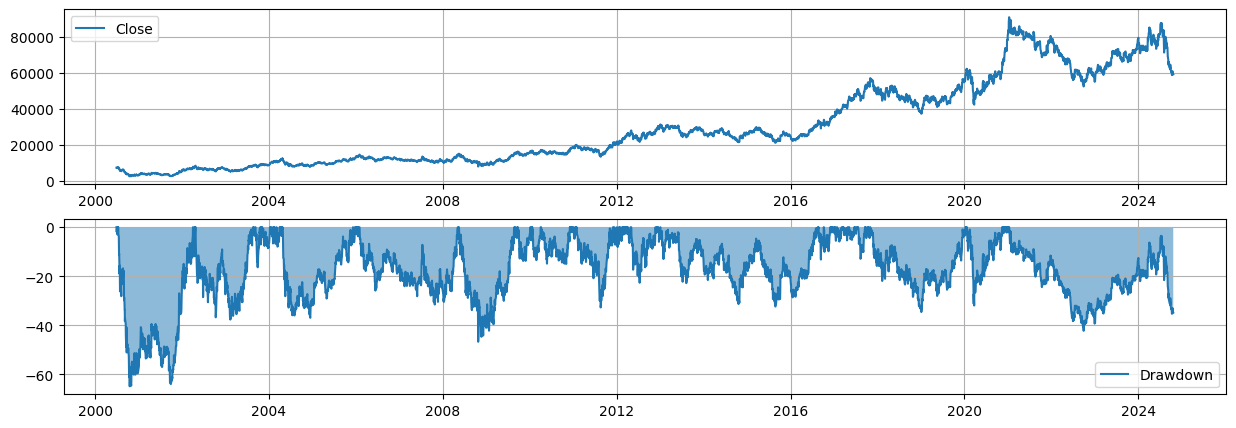

In [108]:
fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(kospi.index, kospi['Close'], label = 'Close')
ax2.plot(kospi.index, kospi['DD'] * -1, label = 'Drawdown')
ax2.fill_between(kospi.index, kospi['DD'] * -1, alpha = 0.5)

ax1.grid()
ax2.grid()

ax1.legend()
ax2.legend()
plt.show()

* 할로윈 투자 전략 : 11월에 사서 다음 년도 4월에 파는 전략.

In [109]:
# 2001 ~ 2023년까지 매년 11월에사서 4월에 파는 것을 백테스팅

cum_rate = 1
for year in range(2001, 2024):
    buy_mon = str(year) + '-11'
    sell_mon = str(year + 1) + '-04'
    buy_price = kospi.loc[buy_mon].iloc[0]['Open']
    sell_price = kospi.loc[sell_mon].iloc[-1]['Close']
    rate = sell_price / buy_price
    cum_rate = cum_rate * rate

cum_rate  # 누적 수익률 약 18배

18.34184339517867

In [110]:
# 연평균 수익률 // 약 13%
CAGR = (cum_rate ** (1 / 24)) - 1
CAGR

0.12886876749473108

In [111]:
simple_rate = kospi.iloc[-1]['Close'] / kospi.iloc[0]['Open'] # 그냥 보유했을 때 8배
simple_rate

8.213296398891966

In [112]:
# 연평균 수익률 9%
simple_rate ** (1/24) - 1

0.09170398515809053

In [113]:
# 정말로 11월에 사면 좋은지?
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime(year = 2001, month = 11, day = 1)
end = start + relativedelta(month = 5)

start.strftime('%Y-%m')

'2001-11'

In [114]:
def month6(df, start_year = 2001, end_year = 2023, month = 11):

    cum_rate = 1
    
    for year in range(start_year, end_year+1):
        
        start = datetime.datetime(year=year, month=month, day = 1)
        end = start + relativedelta(months = 5)

        buy_mon = start.strftime("%Y-%m")
        sell_mon = end.strftime("%Y-%m")

        buy_price = df.loc[buy_mon].iloc[0]['Open']
        sell_price = df.loc[sell_mon].iloc[-1]['Close']

        rate = sell_price / buy_price
        cum_rate = cum_rate * rate

    return cum_rate

In [121]:
# month6(kospi, 2001, 2023, 11)
data = {}
for month in range(1, 13):
    ret = month6(kospi, 2001, 2021, month)
    print(month, ret)
    data = {}

KeyError: '2001-01'

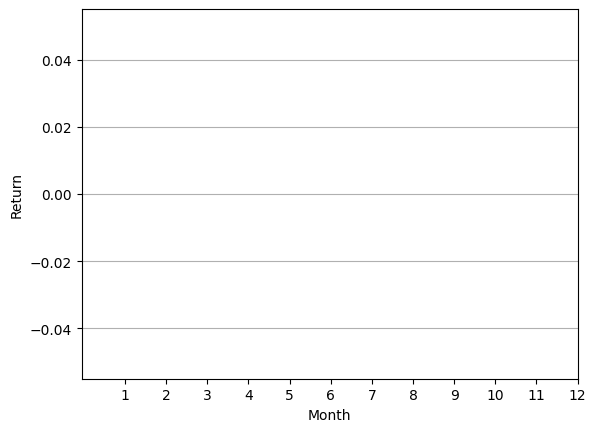

In [120]:
plt.bar(data.keys(), data.values())
plt.xlabel("Month")
plt.ylabel("Return")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(axis = 'y')
plt.show()